In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset/train.csv')

#find the FVC where `Weeks` is closest to 0 (this means the closest measured FVC to the CT Scan date)
df['Weeks_abs'] = df['Weeks'].abs()
closest_weeks_df = df.loc[df.groupby('Patient')['Weeks_abs'].idxmin()]

#Select and rename columns
output_df = closest_weeks_df[['Patient', 'label', 'Weeks', 'FVC', 'Percent']].rename(columns={'Patient': 'patient_id'})

# Split into three categories (FVC within 8 and 12 weeks of CT scans are representative of the current state of the paitent)
between_8 = output_df[(output_df['Weeks'] >= -8) & (output_df['Weeks'] <= 8)]
between_12 = output_df[(output_df['Weeks'] >= -12) & (output_df['Weeks'] <= 12)]
outside_12 = output_df[(output_df['Weeks'] < -12) | (output_df['Weeks'] > 12)]

In [2]:
#labeling function for binary class labels
def percent_to_label_binaryclass(p):
    if p >= 80: #normal
        return 0
    elif p < 80: #not normal
        return 1

In [3]:
#labeling function for multiclass labels
def percent_to_label_multiclass(p):
    if p >= 80: #normal
        return 0
    elif 60 <= p < 80: #mild
        return 1
    elif 50 <= p < 60: #moderate
        return 2
    else:
        return 3 #severe

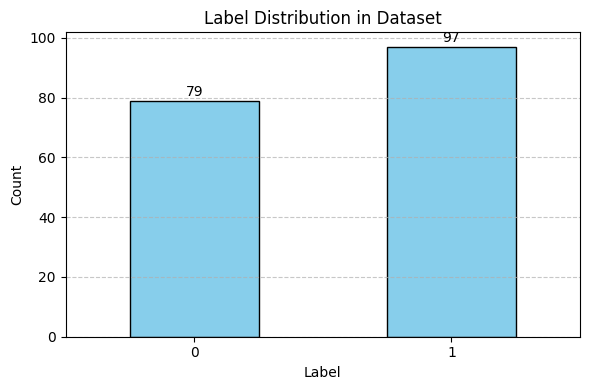

In [4]:
#binary data analysis

# Count each label type
label_counts = closest_weeks_df['label'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add count labels on top of each bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution in Dataset')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#multi class data analysis
closest_weeks_df['label'] = closest_weeks_df['Percent'].apply(percent_to_label_multiclass)